Compare a single cast from IOS observations to model.

IOS observations span many years. So, compare day of, 7 days before and 7 days after.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ACTDR
import netCDF4 as nc
from salishsea_tools import viz_tools
import numpy as np
import datetime
from salishsea_tools import tidetools

import comparisons

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
paths = {'nowcast': '/data/dlatorne/MEOPAR/SalishSea/nowcast/',
        'spinup': '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/'}


In [4]:
ACTDR.load_dat('SOG_2000.dat')

> open  SOG_2000.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG_2000.dat
> complete


In [5]:
data = pd.DataFrame(ACTDR.CTD_DAT)

lon_min=-124.6; lat_min=48;
lon_max=-123.6; lat_max=48.6;

data_region = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

(48, 48.6)

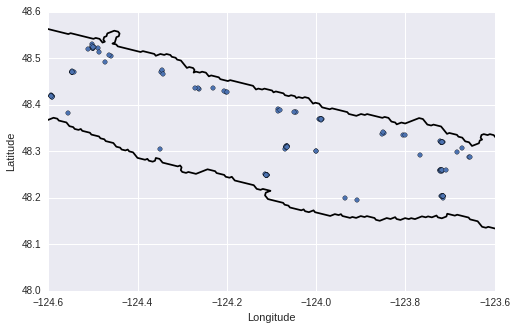

In [6]:
fig,axm = plt.subplots(1,figsize=(8,5))
data_region.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([lon_min,lon_max])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fdde21150>]], dtype=object)

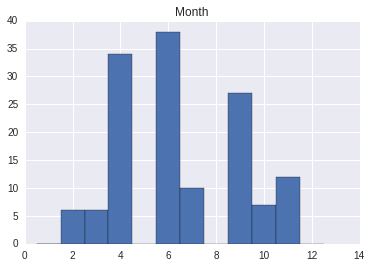

In [7]:
data_region.hist('Month',bins=np.arange(0.5,13.5))

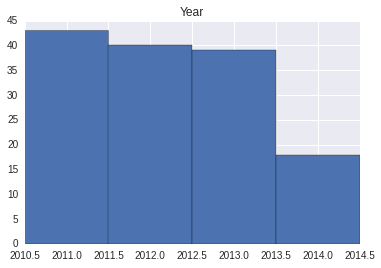

In [8]:
data_region.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

#Subdivide into regions

##Eastern

(48, 48.6)

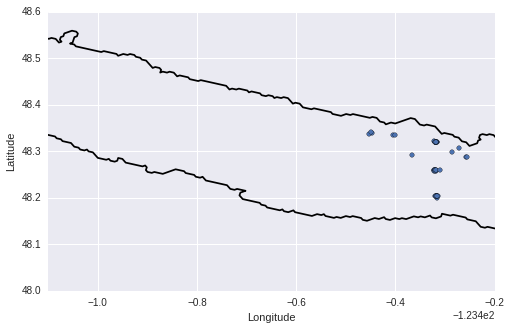

In [9]:
lon_min=-123.9; lat_min=48;
lon_max=-123.6; lat_max=48.6;

data_east = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

fig,axm = plt.subplots(1,figsize=(8,5))
data_east.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([-124.5,lon_max])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fd9d99c10>]], dtype=object)

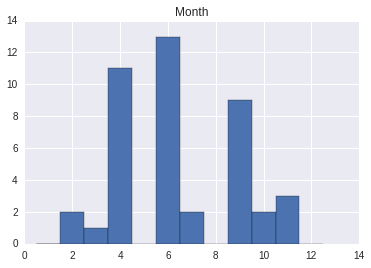

In [10]:
data_east.hist('Month',bins=np.arange(0.5,13.5))

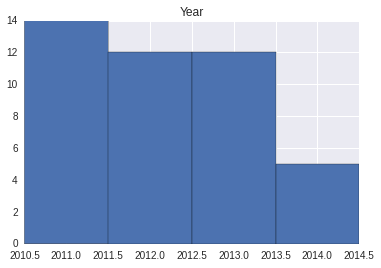

In [11]:
data_east.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

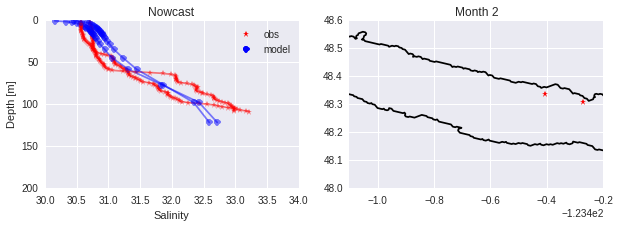

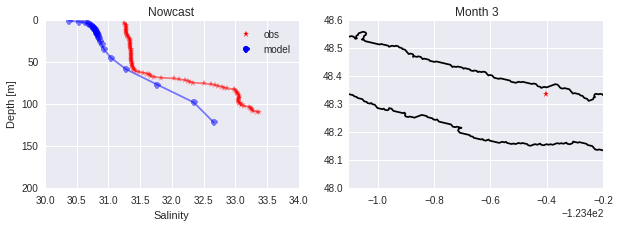

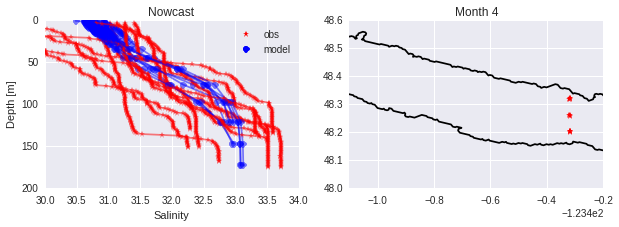

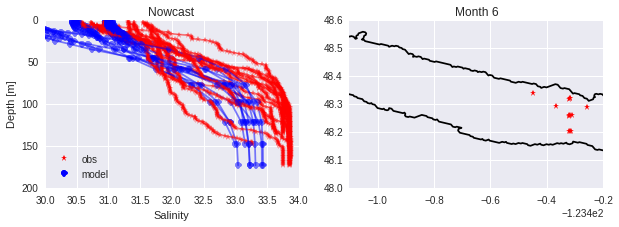

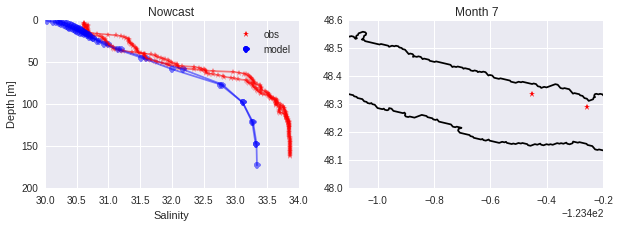

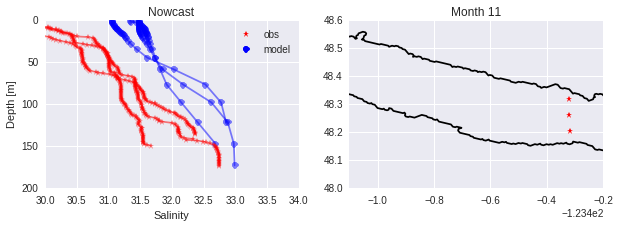

In [12]:
zmax= 200
grouped = data_east.groupby('Month')
for month in grouped.groups.keys():
    if month != 8 and month != 9 and month != 10: 
        if month ==11 or month ==12:
            model_year=2014
        else:
            model_year=2015
        fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,
                                            vmax=34, xmin=-124.5,xmax=lon_max,ymin=lat_min,ymax=lat_max)

##Central

(48, 48.6)

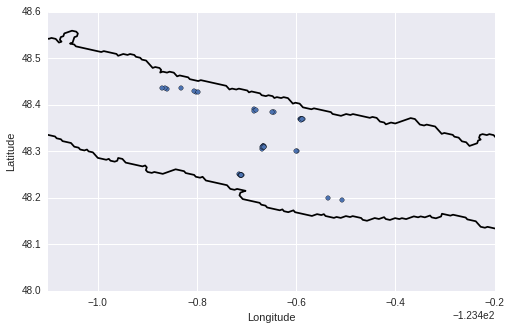

In [13]:
lon_min=-124.3; lat_min=48;
lon_max=-123.9; lat_max=48.6;

data_central = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

fig,axm = plt.subplots(1,figsize=(8,5))
data_central.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([-124.5,-123.6])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fdac75850>]], dtype=object)

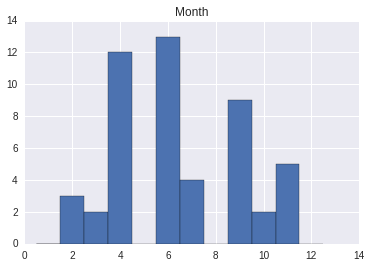

In [14]:
data_central.hist('Month',bins=np.arange(0.5,13.5))

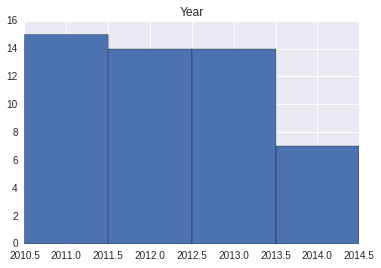

In [15]:
data_central.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

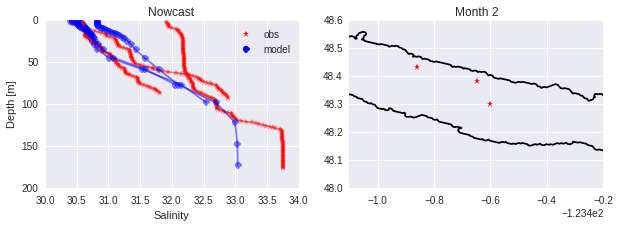

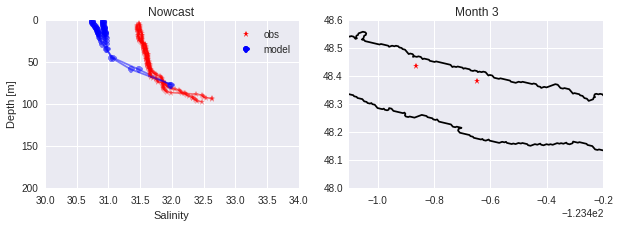

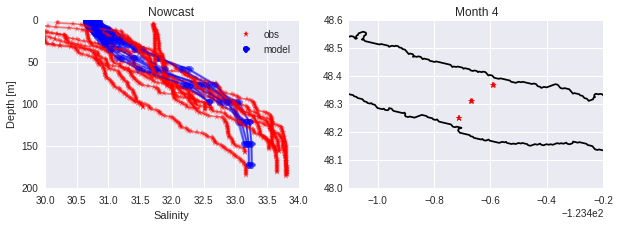

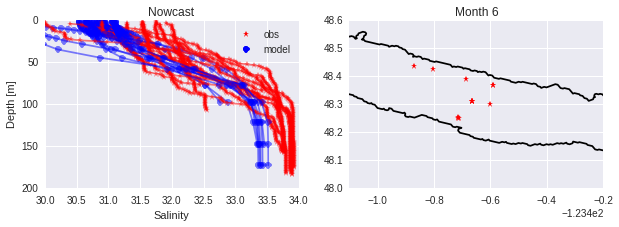

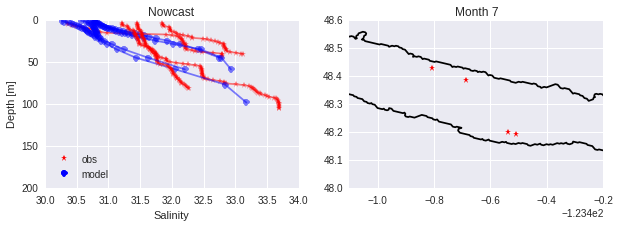

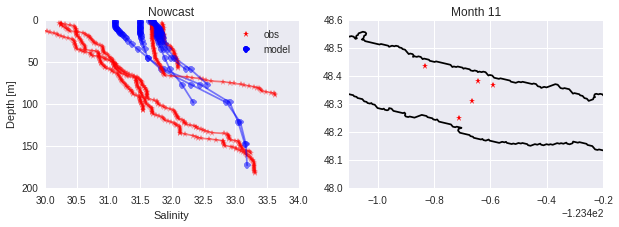

In [16]:
zmax= 200
grouped = data_central.groupby('Month')
for month in grouped.groups.keys():
    if month != 8 and month != 9 and month != 10: 
        if month ==11 or month ==12:
            model_year=2014
        else:
            model_year=2015
        fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_central,paths['nowcast'],zmax=zmax,vmin=30,
                                            vmax=34, xmin=-124.5,xmax=-123.6,ymin=lat_min,ymax=lat_max)

##West

(48, 48.6)

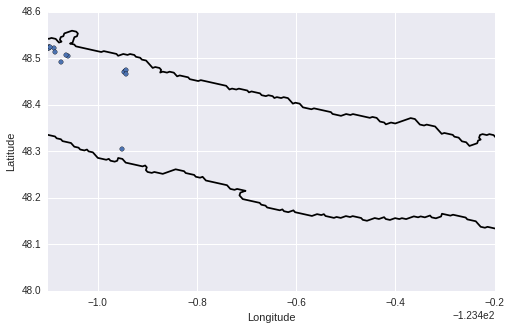

In [17]:
lon_min=-124.5; lat_min=48;
lon_max=-124.3; lat_max=48.6;

data_west = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

fig,axm = plt.subplots(1,figsize=(8,5))
data_west.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([-124.5,-123.6])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fdd756b90>]], dtype=object)

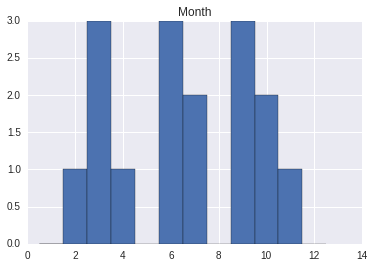

In [18]:
data_west.hist('Month',bins=np.arange(0.5,13.5))

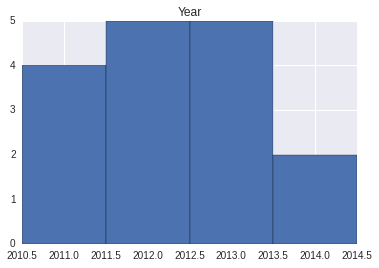

In [19]:
data_west.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

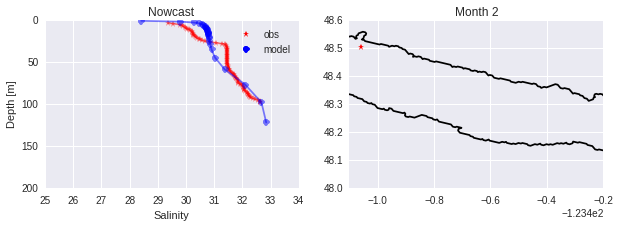

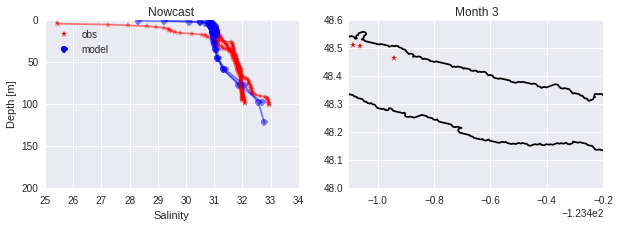

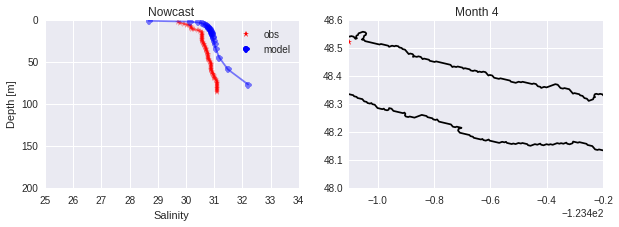

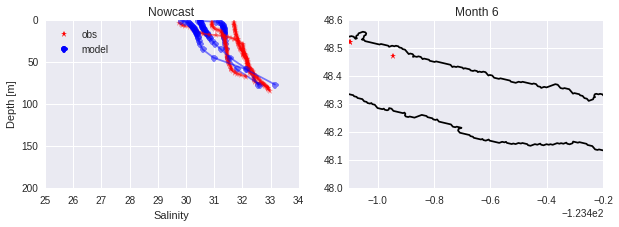

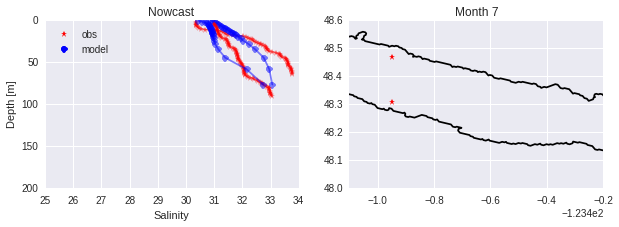

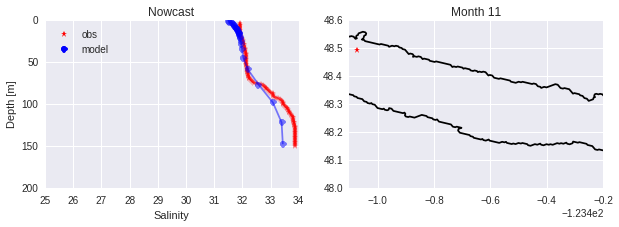

In [20]:
zmax= 200
grouped = data_west.groupby('Month')
for month in grouped.groups.keys():
    if month != 8 and month != 9 and month != 10: 
        if month ==11 or month ==12:
            model_year=2014
        else:
            model_year=2015
        fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_west,paths['nowcast'],zmax=zmax,vmin=25,
                                            vmax=34, xmin=-124.5,xmax=-123.6,ymin=lat_min,ymax=lat_max)

#Cast by cast comparison, organized by month 

## Eastern Region

Question - Are we too salty in the surface?

Use nowcasts 

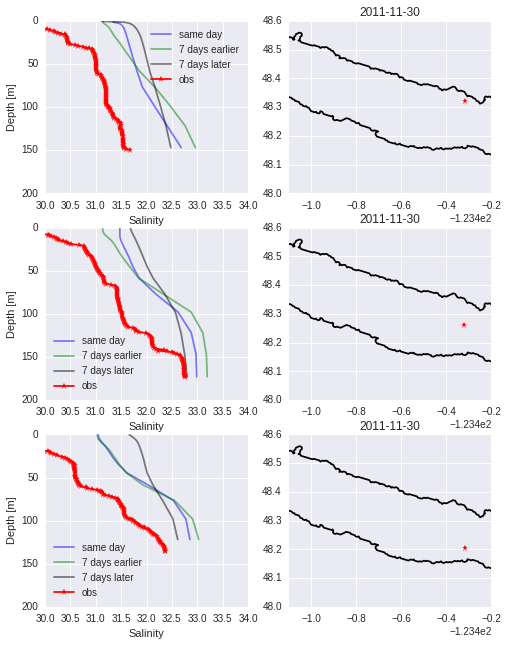

In [21]:
month = 11
xmin=-124.5; xmax=-123.6 
fig=comparisons.compare_cast_model(month,2014,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

* Model is saliter everywhere.
* Note: all of this data was from 2011, a high flow year. Does that matter for the Strait of Juan de Fuca?

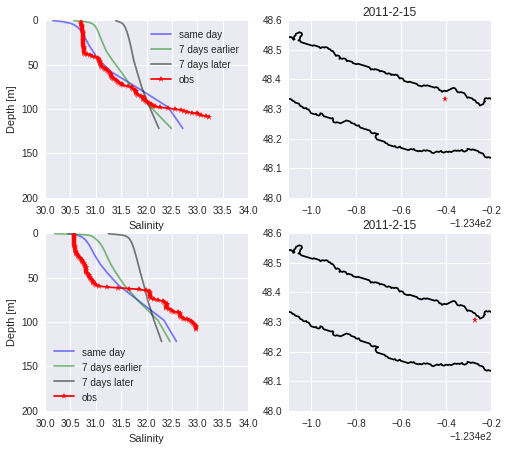

In [22]:
month = 2
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

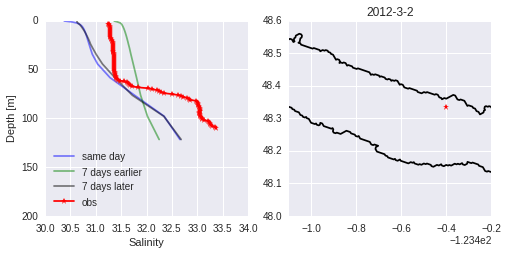

In [23]:
month = 3
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

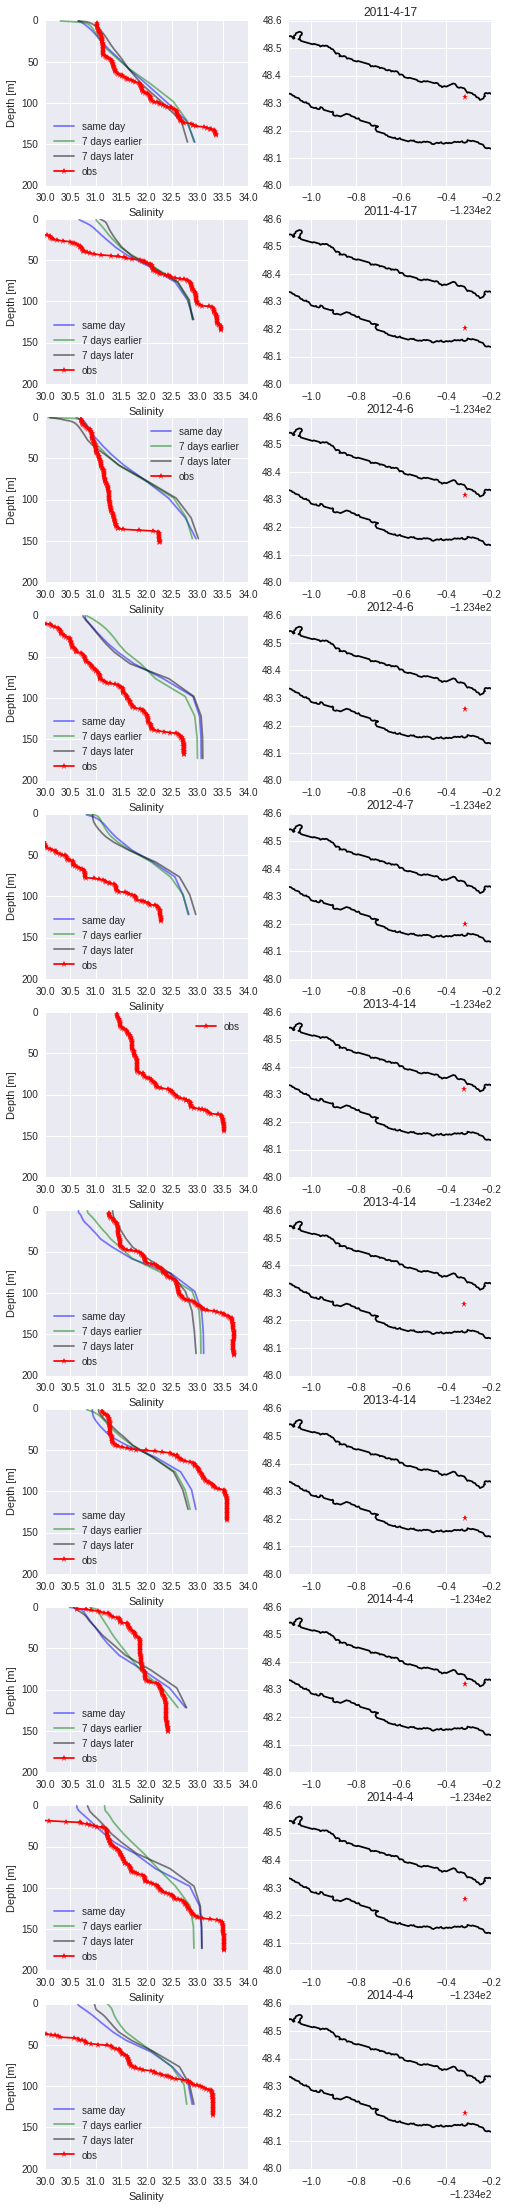

In [24]:
month = 4
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

* Some variability in these comparisons, but there is some consitency within a given year. 
* 2012: Model is saltier everwhere
* 2014: Model surface is usually salter. Observed surface waters has more varibility than the model across the Strait. 

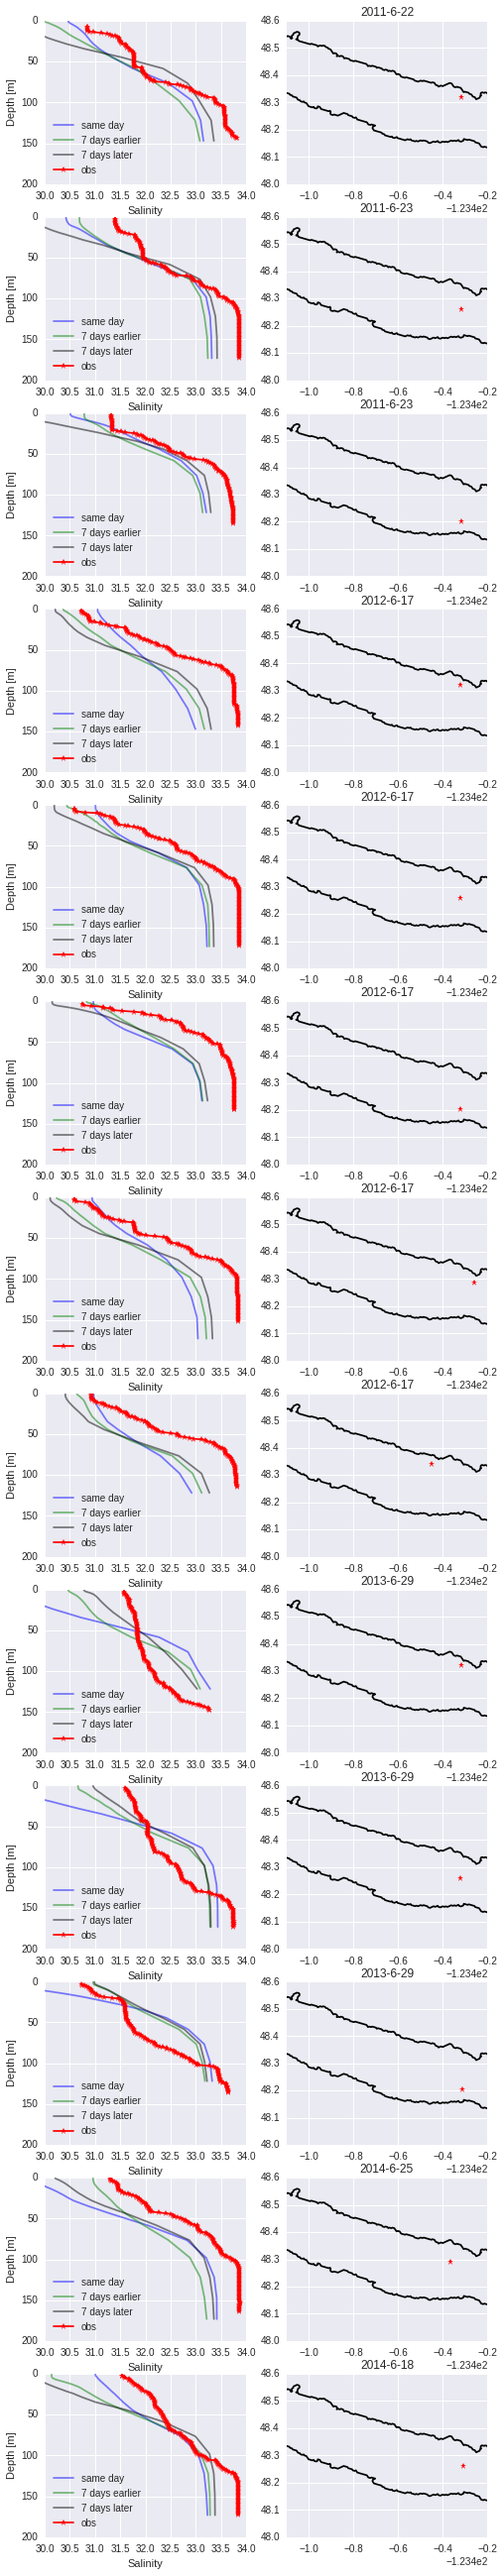

In [25]:
month = 6
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

* Model surface consistently fresher. But 2015 is a strange flow year. There was a large peak in Fraser discharge in April. 
* Model deep is consistently fresher. 

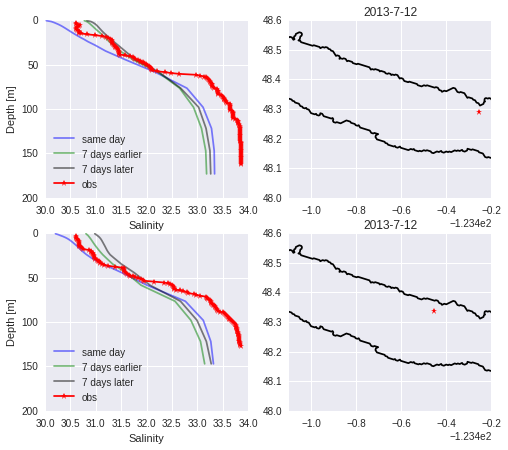

In [26]:
month = 7
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

Model deep is consistently fresher.

#Summary

* Does the interannual variability of the Fraser River discharge affect the surface salinty in the Strait of Juan de Fuca? I see quite a lot of varbility in the JdF surface waters. Is this because of discharge or spring/neap tides. 


* Ideally, we would have time overlap in model/data comparisons.

* I'm struggling to find a consistent trend but will attempt to summarize

* June -  model is too fresh in most comparisons at most depths (possible explanation is the 2015 freshet)
* Spring 2012 - model is too salty in April but then too fresh in June.
* November 2011 - model is too salty in all comparisons at all depths (possible explanation is the large 2011 discharge)


##Next

Try to classify saltiness/freshness by month and year and region more systematically. 